In [1]:
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import warnings
warnings.filterwarnings('ignore')

# La curva IS (Inversión-Ahorro)

## Derivación de la curva IS

La curva IS se deriva de la igualdad entre el ingreso $(Y)$ y la demanda agregada $(DA)$:

$$ Y = C + I + G + X - M $$


Considerando que: 

$$ C = C_0 + bY^d $$

$$ I = I_0 - hr $$

$$ G = G_0 $$

$$ T = tY $$

$$ X = X_0 $$

$$ M = mY^d $$

Para llegar al equilibrio Ahorro-Inversión, debemos restar la tributación $(T)$ de ambos miembros de la igualdad.

$$ Y - T = C + I - T + G + X - M $$

$$ Y^d = C + I - T + G + X - M $$

Esta igualdad se puede reescribir de la siguiente forma:

$$ (Y^d - C) + (T - G) + (M - X) = I $$

Las tres partes de la derecha constituyen los tres componentes del ahorro total $ (S) $: ahorro privado $ (S_p) $, ahorro del gobierno $ (S_g) $ y ahorro externo $ (S_e) $:

$$ S = S_p + S_g + S_e $$


Entonces, el ahorro total es igual a la inversión

$$ S_p + S_g + S_e = I $$

$$ S(Y) = I(r) $$

Haciendo reemplazos se obtiene que:

$$ S_p + S_g + S_e = I_0 - hr $$

$$ (Y^d - C_0 - bY^d) + (T - G_0) + (mY^d - X_0) = I_0 - hr $$

Considerando las observaciones anteriores sobre los componentes de la condición de equilibrio $(Y)$:

$$ [1 - (b - m)(1 - t)]Y - (C_0 + G_0 + X_0) = I_0 - hr $$

La curva IS se puede expresar con una ecuación donde la tasa de interés es una función del ingreso:

$$ hr = (C_0 + G_0 + I_0 + X_0) - (1 - (b - m)(1 - t))Y $$

$$ r = \frac{1}{h}(C_0 + G_0 + I_0 + X_0) - \frac{1 - (b - m)(1 - t)}{h}Y $$

Y puede simplificarse en:

$$ r = \frac{B_0}{h} - \frac{B_1}{h}Y $$

Donde $ B_0 = C_0 + G_0 + I_0 + X_0  $ es el intercepto y $  B_1 = 1 - (b - m)(1 - t) $ es la pendiente.

Y la curva IS se grafica de la siguiente manera:

In [2]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

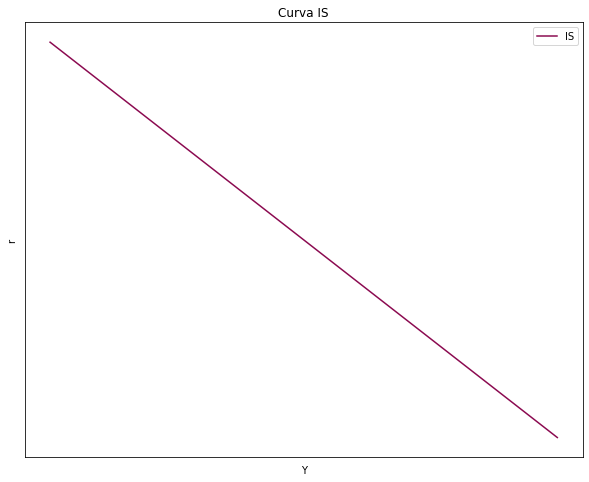

In [3]:
# Gráfico de la curva IS

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "#8B0A50") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title = "Curva IS", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()


## Derivación de la curva IS a partir de la Demanda Agregada

Recordemos la ecuación del ingreso de equilibrio a corto plazo que fue obtenida a partir del equilibrio $(Y = DA)$:

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

Esta ecuación, después de algunas operaciones, puede expresarse en función de la tasa de interés $(r)$:

$$ r = \frac{1}{h}(C_0 + G_0 + I_0 + X_0) - \frac{1 - (b - m)(1 - t)}{h}Y $$

Entonces, la curva IS puede ser simplificada de la siguiente manera:

$$ r = \frac{B_0}{h} - \frac{B_1}{h}Y $$

Donde $ B_0 = C_0 + G_0 + I_0 + X_0  $ y $  B_1 = 1 - (b - m)(1 - t) $

Para la derivación gráfica, se tiene que recordar la ecuación de la Demanda Agregada $(DA)$:

- **Demanda Agregada**:

In [4]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

#--------------------------------------------------
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

#--------------------------------------------------
# Segunda curva de ingreso de equilibrio

    # Definir cualquier parámetro autónomo
Go = 35

# Generar la ecuación con el nuevo parámetro
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


**- Curva IS**:

In [5]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

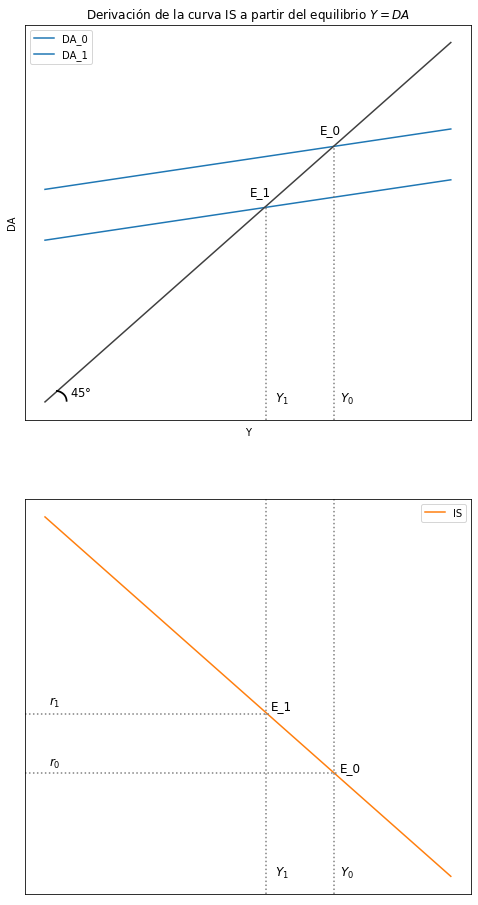

In [6]:
# Gráfico de la derivación de la curva IS a partir de la igualdad (DA = Y)

    # Dos gráficos en un solo cuadro (ax1 para el primero y ax2 para el segundo)
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: ingreso de Equilibrio
ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.plot(Y, DA_IS_K, label = "DA_0", color = "C0") 
ax1.plot(Y, DA_G, label = "DA_1", color = "C0") 
ax1.plot(Y, L_45, color = "#404040") 

ax1.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
ax1.axvline(x = 54,  ymin= 0, ymax = 0.54, linestyle = ":", color = "grey")

ax1.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
ax1.text(2.5, -3, '$◝$', fontsize = 30, color = 'black')
ax1.text(72, 0, '$Y_0$', fontsize = 12, color = 'black')
ax1.text(56, 0, '$Y_1$', fontsize = 12, color = 'black')
ax1.text(67, 185, 'E_0', fontsize = 12, color = 'black')
ax1.text(50, 142, 'E_1', fontsize = 12, color = 'black')

ax1.set(title = "Derivación de la curva IS a partir del equilibrio $Y=DA$", xlabel = r'Y', ylabel = r'DA')
ax1.legend()

#---------------------------------
    # Gráfico 2: Curva IS

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.plot(Y, r, label = "IS", color = "C1") 

ax2.axvline(x = 70.5, ymin= 0, ymax = 1, linestyle = ":", color = "grey")
ax2.axvline(x = 54,  ymin= 0, ymax = 1, linestyle = ":", color = "grey")
plt.axhline(y = 151.5, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axhline(y = 165, xmin= 0, xmax = 0.55, linestyle = ":", color = "grey")

ax2.text(72, 128, '$Y_0$', fontsize = 12, color = 'black')
ax2.text(56, 128, '$Y_1$', fontsize = 12, color = 'black')
ax2.text(1, 153, '$r_0$', fontsize = 12, color = 'black')
ax2.text(1, 167, '$r_1$', fontsize = 12, color = 'black')
ax2.text(72, 152, 'E_0', fontsize = 12, color = 'black')
ax2.text(55, 166, 'E_1', fontsize = 12, color = 'black')

ax2.legend()

plt.show()

## Estática comparativa en la curva IS

### Disminución en el Gasto de Gobierno $(G_0)$:

In [7]:
#--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # NUEVA curva IS
    
# Definir SOLO el parámetro cambiado
Go = 60

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


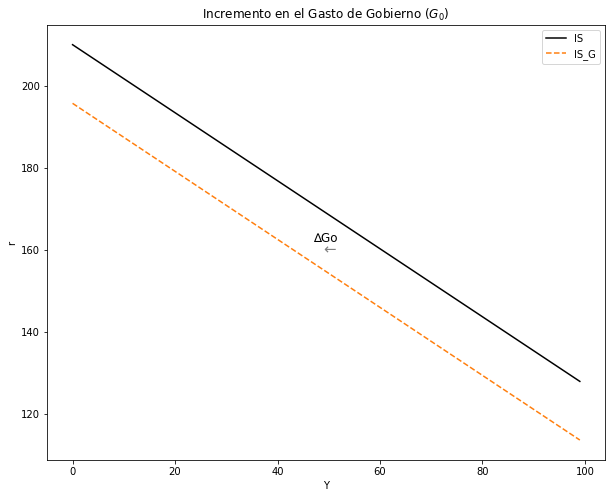

In [8]:
    # Gráfico

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "black") #IS orginal
ax.plot(Y, r_G, label = "IS_G", color = "C1", linestyle = 'dashed') #Nueva IS

# Texto agregado
plt.text(47, 162, '∆Go', fontsize=12, color='black')
plt.text(49, 159, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title = "Incremento en el Gasto de Gobierno $(G_0)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

In [9]:
# Gráfico con movimiento

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y): # ecuación original
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


    # Definir ecuación y gráfico para el parámetro específico
def r_IS_1(Go):
    r_IS_1 = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h  
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(r_IS_1, label = "IS", color = "C1") # Curva IS orginal
    plt.plot(r_G, label = "IS_Go", color = "black") # Curva IS con movimiento
    plt.title('Gasto de Gobierno')
    plt.legend()    
    
    # crear gráfico con movimiento/control
Go_slide = widgets.FloatSlider(value = 70, min = 0, max = 110)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(r_IS_1, Go = Go_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=70.0, description='Go', max=110.0), Output()), _dom_classes=('widget-i…

<function __main__.r_IS_1(Go)>

### Incremento en la tasa impositiva $(t)$:

In [10]:
#--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # NUEVA curva IS
    
# Definir SOLO el parámetro cambiado
t = 0.7

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


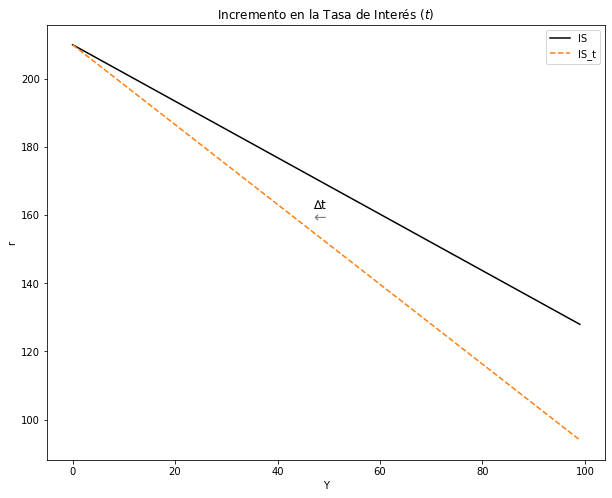

In [11]:
    # Gráfico

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "black") #IS orginal
ax.plot(Y, r_t, label = "IS_t", color = "C1", linestyle = 'dashed') #Nueva IS

# Texto agregado
plt.text(47, 162, '∆t', fontsize=12, color='black')
plt.text(47, 158, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title = "Incremento en la Tasa de Interés $(t)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

In [12]:
# Gráfico con movimiento

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y): # ecuación original
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

    # Definir ecuación y gráfico para el parámetro específico
def r_IS_1(t):
    r_IS_1 = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h  
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(r_IS_1, label = "IS", color = "C1") # Curva IS orginal
    plt.plot(r_t, label = "IS_t", color = "black") # Curva IS con movimiento
    plt.title('Tasa de Interés $(t)$')
    plt.legend()    
    
    # crear gráfico con movimiento/control
t_slide = widgets.FloatSlider(value = 0.3, min = 0, max = 1)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(r_IS_1, t = t_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=0.3, description='t', max=1.0), Output()), _dom_classes=('widget-inter…

<function __main__.r_IS_1(t)>